# Setup

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

In [47]:
#Config
Dimensioni = (480, 640, 3)
AltezzaLineaIniziale = Dimensioni[0] - 40
Raggio = 80
PAngolo = 0
SemiRage = 214
DimensioneSemicerchio = SemiRage * 2 + 1

Punti = np.zeros((5,2), dtype="uint16")

# Modi per prendere l'immagine


In [48]:
# Carica l'immagine
img = cv2.imread('TestFoto/foto1.jpg')
imgD = np.array(img)

# Codice

In [49]:
# Void setup
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

riga = imgGray[AltezzaLineaIniziale, :]  # Riga selezionata
rigader = np.gradient(riga)  # Derivata della riga
Punti[0] = AltezzaLineaIniziale, round((np.argmax(rigader) + np.argmin(rigader))/2)

In [50]:
# void loop
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
riga = imgGray[AltezzaLineaIniziale, :]  # Riga selezionata
rigader = np.gradient(riga)
Punti[0] = AltezzaLineaIniziale, round((np.argmax(rigader) + np.argmin(rigader))/2) + (Punti[0][1] - SemiRage)
cv2.circle(imgD, (Punti[0][1], Punti[0][0]), 5, (255, 0, 0), -1)

/tmp/ipykernel_88140/1481827438.py:5: RuntimeWarning: overflow encountered in scalar subtract
  Punti[0] = AltezzaLineaIniziale, round((np.argmax(rigader) + np.argmin(rigader))/2) + (Punti[0][1] - SemiRage)
/tmp/ipykernel_88140/1481827438.py:5: RuntimeWarning: overflow encountered in scalar add
  Punti[0] = AltezzaLineaIniziale, round((np.argmax(rigader) + np.argmin(rigader))/2) + (Punti[0][1] - SemiRage)


array([[[160, 178, 179],
        [160, 178, 179],
        [162, 178, 177],
        ...,
        [115, 126, 123],
        [117, 128, 125],
        [119, 130, 127]],

       [[162, 177, 179],
        [162, 177, 179],
        [162, 178, 177],
        ...,
        [113, 124, 121],
        [114, 125, 122],
        [115, 126, 123]],

       [[164, 178, 177],
        [164, 178, 177],
        [164, 178, 177],
        ...,
        [115, 124, 121],
        [113, 124, 121],
        [113, 124, 121]],

       ...,

       [[209, 213, 214],
        [209, 213, 214],
        [209, 213, 214],
        ...,
        [189, 194, 193],
        [188, 194, 193],
        [189, 195, 194]],

       [[209, 213, 214],
        [209, 213, 214],
        [209, 213, 214],
        ...,
        [189, 194, 193],
        [188, 194, 193],
        [189, 195, 194]],

       [[209, 213, 214],
        [209, 213, 214],
        [209, 213, 214],
        ...,
        [189, 194, 193],
        [188, 194, 193],
        [188, 194, 193]]

In [51]:
semicerchio = np.zeros((DimensioneSemicerchio), dtype="uint8")
RadStep = np.pi / (DimensioneSemicerchio - 1)
for j in range(4):
    for i in range(DimensioneSemicerchio):
        P = (round(Punti[j][0] - Raggio * np.sin(RadStep * i + PAngolo)), round(Punti[j][1] + Raggio * np.cos(RadStep * i + PAngolo)))
        semicerchio[i] = imgGray[P]

        cv2.circle(imgD, (P[1], P[0]), 1, (255, 0, 0), -1)

    semicerchioder = np.gradient(semicerchio)
    indice = round((np.argmax(semicerchioder) + np.argmin(semicerchioder))/2)
    PAngolo = RadStep * indice + PAngolo
    Punti[j + 1] = round(Punti[j][0] - Raggio * np.sin(PAngolo)), round(Punti[j][1] + Raggio * np.cos(PAngolo))
    PAngolo=  PAngolo - np.pi / 2

    cv2.circle(imgD, (Punti[j + 1][1], Punti[j + 1][0]), 5, (255, 0, 0), -1)
    cv2.circle(imgD, (Punti[j][1], Punti[j][0]), Raggio, (0, 0, 255), 1)

OverflowError: Python integer -23 out of bounds for uint16

# Let me see plz

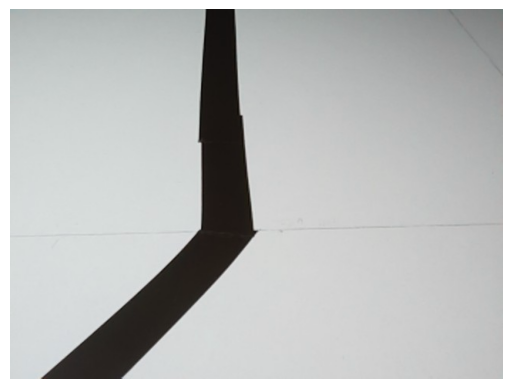

In [17]:
# Mostra l'immagine
plt.imshow(img)
plt.axis('off')  # Rimuovi gli assi, opzionale
plt.show()

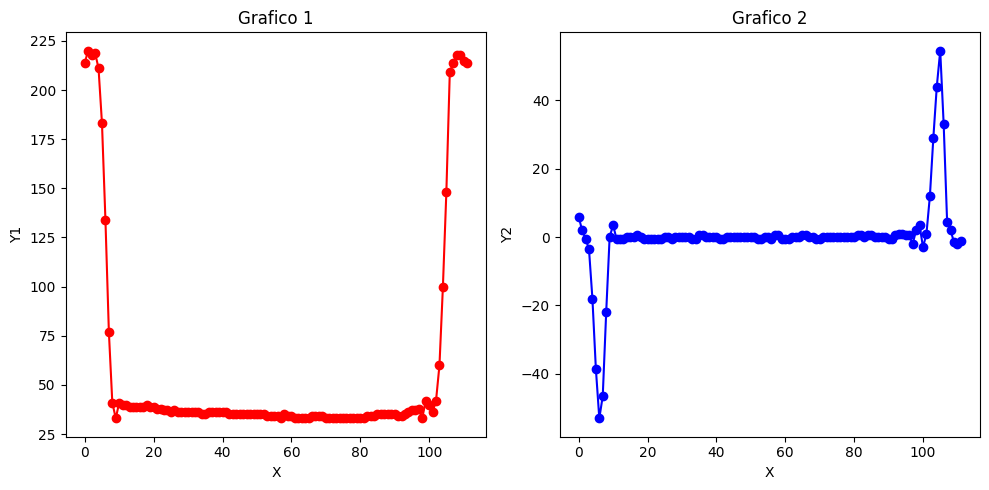

In [18]:
# Creazione della figura e degli assi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Primo grafico
ax1.plot(riga, marker='o', color='r', label="Valori")
ax1.set_title('Grafico 1')
ax1.set_xlabel('X')
ax1.set_ylabel('Y1')

# Secondo grafico
ax2.plot(rigader, marker='o', color='b', label="Valori")
ax2.set_title('Grafico 2')
ax2.set_xlabel('X')
ax2.set_ylabel('Y2')

# Mostra i grafici
plt.tight_layout()
plt.show()


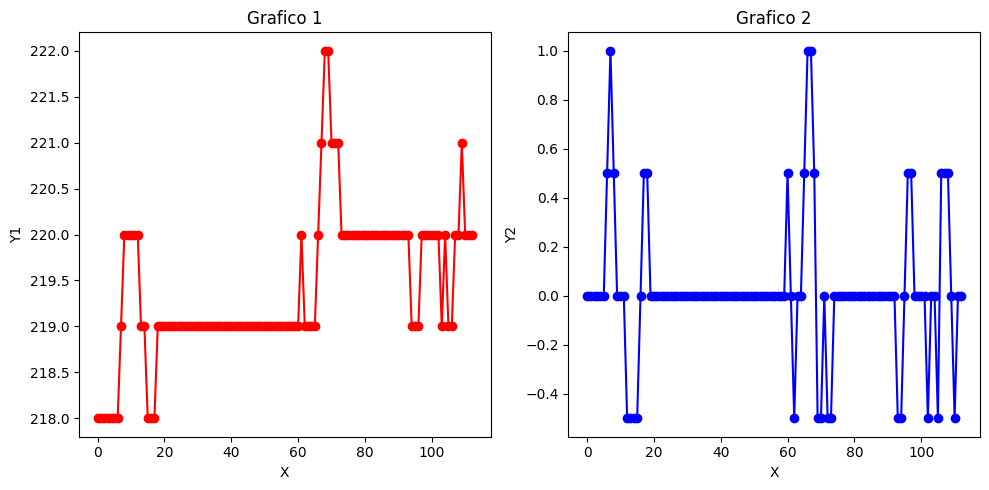

In [19]:
# Creazione della figura e degli assi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Primo grafico
ax1.plot(semicerchio, marker='o', color='r', label="Valori")
ax1.set_title('Grafico 1')
ax1.set_xlabel('X')
ax1.set_ylabel('Y1')

# Secondo grafico
ax2.plot(semicerchioder, marker='o', color='b', label="Valori")
ax2.set_title('Grafico 2')
ax2.set_xlabel('X')
ax2.set_ylabel('Y2')

# Mostra i grafici
plt.tight_layout()
plt.show()


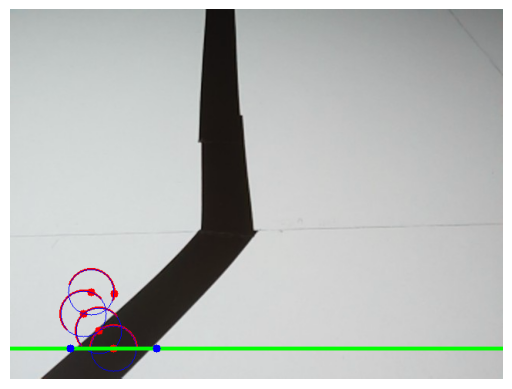

In [20]:
#disegna il cerhio e la linea base
cv2.line(imgD, (0, AltezzaLineaIniziale), (Dimensioni[1], AltezzaLineaIniziale), (0, 255, 0), 3)


cv2.circle(imgD, (Punti[0][1] + SemiRage, Punti[0][0]), 5, (0, 0, 255), -1)
cv2.circle(imgD, (Punti[0][1] - SemiRage, Punti[0][0]), 5, (0, 0, 255), -1)

plt.imshow(imgD)
plt.axis('off')  # Rimuovi gli assi, opzionale
plt.show()
